# **<빅데이터 개론 6주차 과제 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata Project.ipynb 파일을 SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2022.10.03(월요일) ~ 2022.10.09(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**


- - -


데이터 참고 
https://www.kaggle.com/datasets/uddhavparab/telecom-company-dataset-logistic-regression


## Q1. 데이터 전처리 (10점)

**<사용되는 데이터 - churn_data.csv>**

실습 시간에 배운 모든 방법을 활용하여 churn_data.csv 파일의 내용을 데이터 프레임으로 저장한 후 결측값을 제거하자(10점).

```
<조건>
1. 입력받은 데이터프레임의 모든열(column)을 확인하여 결측값이 있으면 모두 제거한다.
   - 결측값이 있으면 결측값이 있는 행을 제거한다. 
2. 코드 작성 후 간단한 코드 설명을 작성한다. 
```

In [ ]:
install.packages("data.table")
library(data.table)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## 자신의 구글드라이브에 파일을 업로드 할 수 있도록 수정하세요.
## https://drive.google.com/file/d/1etLvlILV7yKz9f8N-19ItMncxszHVZ3P/view?usp=sharing


system("gdown --id 1etLvlILV7yKz9f8N-19ItMncxszHVZ3P")
system("ls", TRUE)

[1] "churn_data.csv" "sample_data"

In [ ]:
DF <- fread("/content/churn_data.csv", encoding = "UTF-8")

In [ ]:
## 코드 작성
DF <- fread("churn_data.csv", encoding = "UTF-8")
DF <- na.omit(DF)

In [ ]:
#코드 설명
##fread를 사용하여 csv파일 데이터를 UTF-8형태로 인코딩하여 읽어온뒤, na.omit()을 사용하여 na값을 가진 행을 삭제한뒤,
##결측값을 제거한 데이터 프레임을 DF에 저장한다.

## Q2. Contract Average 그래프(ggplot2 이용) (40점)

**<사용되는 데이터 - churn_data.csv >**

Q1에서 전처리한 데이터를 사용하여 조건에 맞는 그래프를 그려보자

```
<참고사항> 
1. Q1 에서 전처리한 데이터를 사용할 것.
2. 반드시 ggplot2로 진행하고 아래의 조건을 만족할 것.

<조건> 
1. Contract 열(column)의 값을 기준으로 TotalCharges 열(column)의 평균값을 구한다.
2. Contract 열(column)은 Month-to-month, One year, Two year 값을 가진다.
3. ggtitle를 이용해서 그래프의 제목을 설정할 것.
4. 옵션(option)은 그래프 제목(main), x/y축 이름(xlab, ylab)은 반드시 포함해야 함. 그 외의 옵션은 자유롭게 설정할 것.
5. 그래프는 geom_bar를 사용하여 그래프를 출력한다.
6. 그래프에는 간략한 설명 (2~3 줄)을 포함할 것. 

```
(1)	소스 코드 및 결과 (30 점)

(2)	그래프 간략 설명 (10 점)



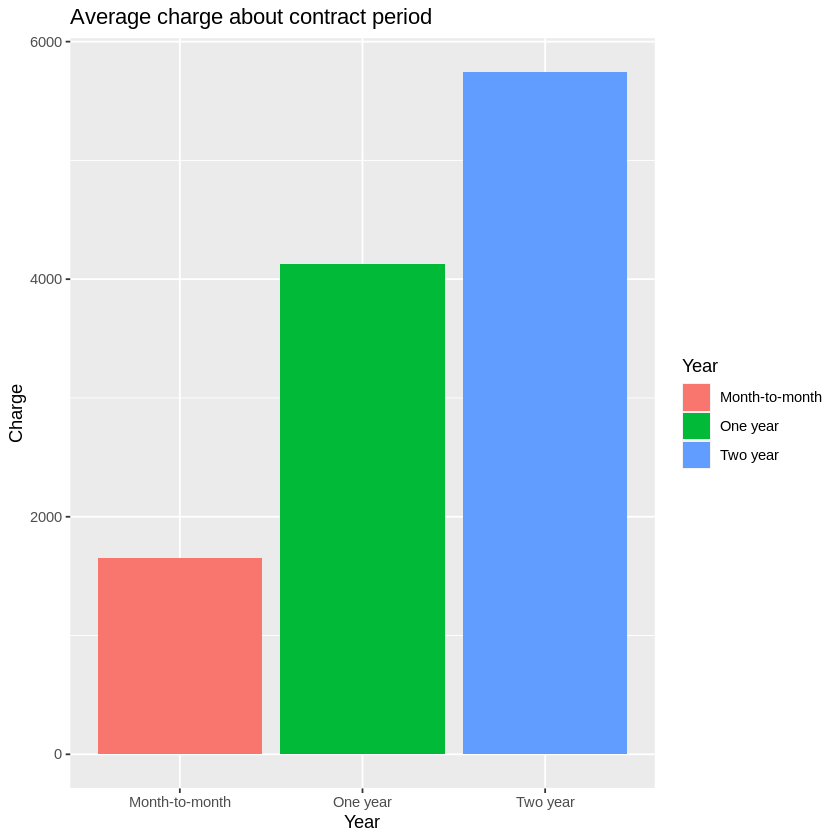

In [145]:
# 코드 작성
mtom <- subset(DF,Contract == 'Month-to-month')
mtom_avg <- mean(mtom$TotalCharges)

oy <- subset(DF,Contract == 'One year')
oy_avg <- mean(oy$TotalCharges)

ty <- subset(DF,Contract == 'Two year')
ty_avg <- mean(ty$TotalCharges)

Year <- c("Month-to-month" , 'One year' , 'Two year')
Charge <- c(mtom_avg,oy_avg,ty_avg)
newDF <- data.frame(Year,Charge)


ggplot(newDF,aes(x = Year, y = Charge)) + geom_bar(stat="identity",aes(fill = Year)) +ggtitle("Average charge about contract period")

In [ ]:
#코드 설명
#subset을 사용하여 DF에서 Contract가 Month-to-month인지 One year인지 Two year인지에 따라 각각 데이터 프레임을 만들고, 그 각각마다 mean을 사용하여 TotalCharges의 평균값을 구해 저장했고,
#그렇게 구한 값들을 합쳐서 새로운 newDF라는 데이터프레임을 만들었습니다.
#그 다음 newDF을 이용하여 ggplot과 geom_bar를 사용하여 x는 Year를 기준으로 y는 Charge를 기준으로 그리고 y축의 높이를 데이터의 값으로 하는 bar그래프의 형태로 Year를 색깔로 칠해주는 것으로 설정했고,
#ggtitle을 사용하여 타이틀을 설정해 주었습니다.

## Q3. Gender of Contaract Count 그래프(ggplot2 이용) (50점)

**<사용되는 데이터 - churn_data.csv >**

Q1에서 전처리한 데이터를 사용하여 조건에 맞는 그래프를 그려보자

```
<참고사항> 
1. Q1에서 전처리한 데이터를 사용할 것.
2. 반드시 ggplot2로 진행하고 아래의 조건을 만족할 것.

<조건> 
1. Gender 열(column)의 값을 기준으로 분류하고 분류한 데이터 중MultipleLines이 0인 값만 추출한다. 
2. 예시와 같이 추출한 데이터의 Contract 열(column)의 각각 Count을 구한다.
3. 예시에 나와있는 그래프와 동일한 그래프를 출력 하시오.
   - geom_histogram을 사용하여 그래프를 출력한다.
4. ggtitle를 이용해서 그래프의 제목을 설정할 것.
5. 그래프에는 간략한 설명 (2~3 줄)을 포함할 것. 
```
(1) 소스 코드 및 결과 (40 점)

(2)	그래프 간략 설명 (10 점)



조건 2. Ex) 추출한 데이터의 Contract 열(column)의 각각 Count의 예

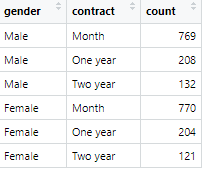

Ex) 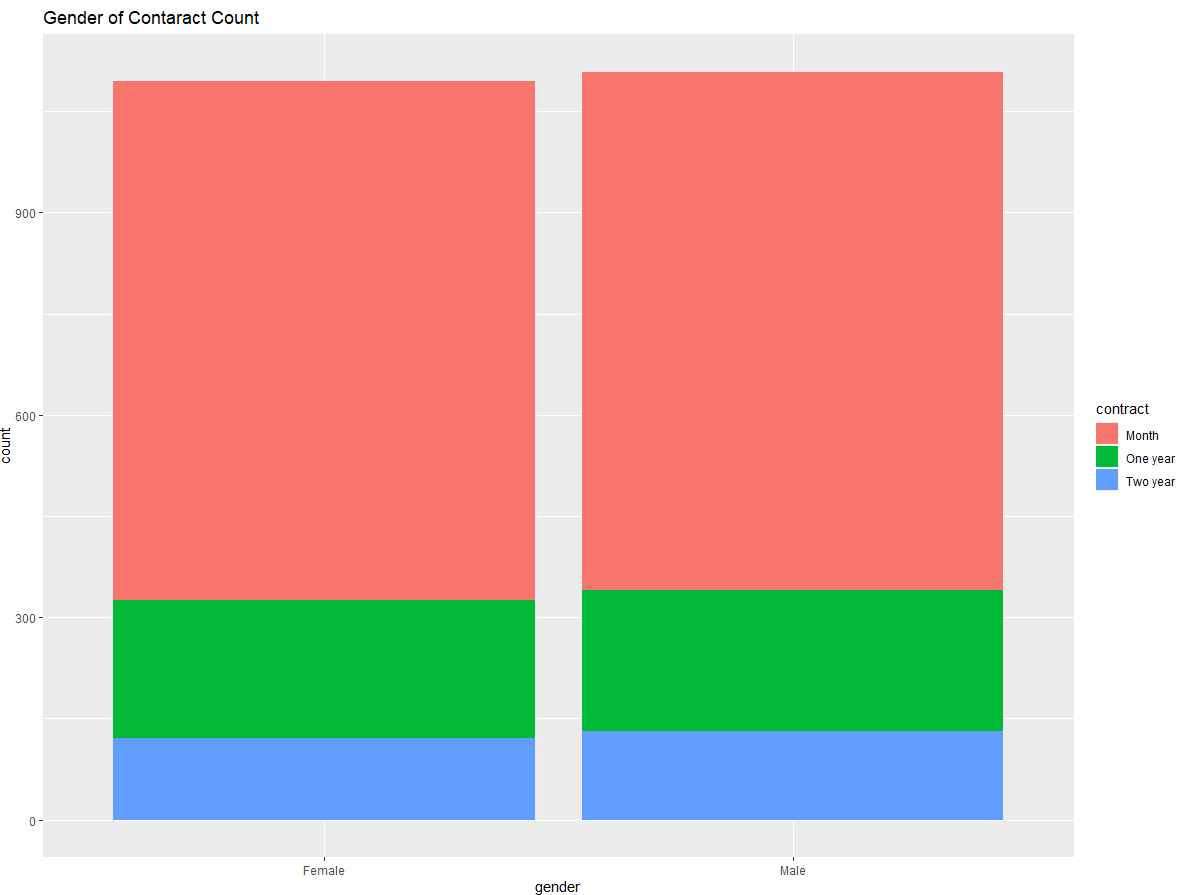

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


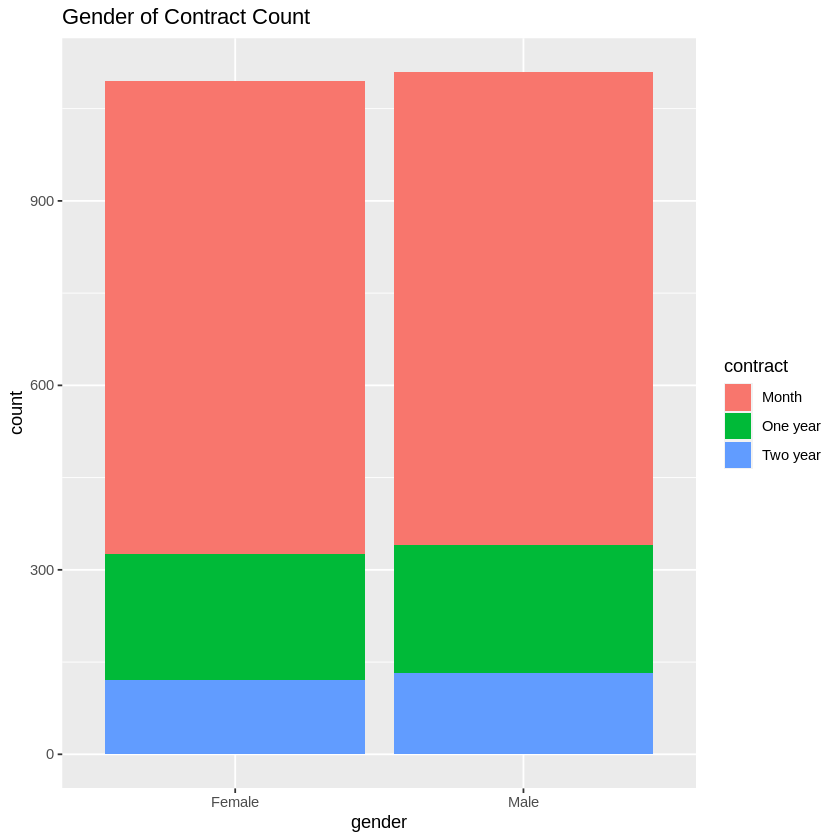

In [149]:
# 코드 작성
malemtom <- subset(DF,gender == "Male"&Contract == 'Month-to-month'&MultipleLines==0)
maleoy <- subset(DF,gender == "Male"&Contract == 'One year'&MultipleLines==0)
malety <- subset(DF,gender == "Male"&Contract == 'Two year'&MultipleLines==0)
femalemtom <- subset(DF,gender == "Female"&Contract == 'Month-to-month'&MultipleLines==0)
femaleoy <- subset(DF,gender == "Female"&Contract == 'One year'&MultipleLines==0)
femalety <- subset(DF,gender == "Female"&Contract == 'Two year'&MultipleLines==0)

gender = c("Male","Male","Male","Female","Female","Female")
contract = c("Month","One year",'Two year',"Month","One year",'Two year')
count = c(nrow(malemtom),nrow(maleoy),nrow(malety),nrow(femalemtom),nrow(femaleoy),nrow(femalety))

GenderDF <- data.frame(gender,contract,count)
GenderDF$count <- as.integer(GenderDF$count)

ggplot(GenderDF,aes(x = gender,y=count)) + geom_histogram(stat='identity',aes(fill=contract)) +ggtitle("Gender of Contract Count")

In [ ]:
#코드 설명
#각각 Male인 것들과 Female인 것들,Contract가 Month-to-month인지 One year인지 Two year인지 그리고 MultipleLines == 0인 것들을 모두 만족하게 각각 subset을 사용하여 데이터 프레임을 만들었습니다.
#그리고 원하는 데이터 프레임을 만들기 위해서 gender,contract를 c를 사용하여 벡터로 각각 만들어 주었습니다. 그리고 nrow 함수를 사용하여 각각의 데이터 프레임에서 행의 수를 계산해서 count벡터에 넣었습니다.
#GenderDF라는 데이터프레임을 만들고, 그 중에서 count열을 integer형태로 바꾸어주었습니다.
#그 다음 GenderDF을 이용하여 ggplot과 geom_histogram을 사용하여 x는 gender를 기준으로 y는 count를 기준으로 그리고 y축의 높이를 데이터의 값으로 하는 bar그래프의 형태로 contract를 색깔로 칠해주는 것으로 설정했고,
#ggtitle을 사용하여 타이틀을 설정해 주었습니다.